Resolver las ecuaciones diferenciales
$$
\frac{d}{d t} \alpha_{a}^{-1}=-\frac{b_{a}}{2 \pi} \quad(a=1,2,3),
$$
donde, para un valor inicial del parametro, $t$, $t_0=4.5$ (adimensional) 
$$
\left(\alpha_{1}, \alpha_{2}, \alpha_{3}\right)=(0.01694, 0.03375, 0.1176),
$$
en dos casos:
$$
\left(b_{1}, b_{2}, b_{3}\right)=\left\{\begin{array}{ll}
\left(\frac{41}{10},-\frac{19}{6},-7\right) & \text { Standard Model } \\
\left(\frac{33}{5},1,-3\right) & \text { MSSM }
\end{array}\right.
$$
Demostrar que en el rango: $t_0$ a $t_{\text{max}}=50$ solo en el segundo caso: MSSM, las tres funciones $\alpha_a^{-1}$ convergen a un punto, y determinar el correspondiente valor de $t$. 

In [5]:
%pylab inline
import numpy as np
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


In [6]:
α_0=[0,0.01694,0.03375,0.1176]

In [7]:
b_SM=[0,41/10,-19/6,-7]
b_MSSM=[0,33/5,1,-3]

In [8]:
def dαinv_dt(αinv,t,b=b_MSSM[3]):
    return -b/(2*np.pi)

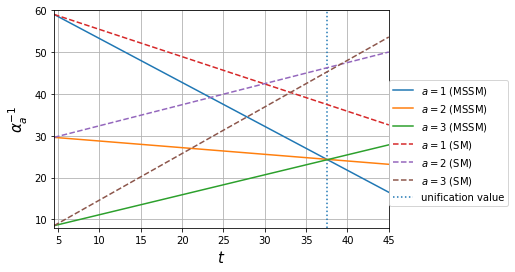

In [9]:
t=np.linspace(4.5,45)
t_U=37.5
plt.plot( t, integrate.odeint(dαinv_dt,1/α_0[1],t,args=( b_MSSM[1], )),'-',label='$a=1$ (MSSM)' )
plt.plot( t, integrate.odeint(dαinv_dt,1/α_0[2],t,args=( b_MSSM[2], )),'-',label='$a=2$ (MSSM)' )
plt.plot( t, integrate.odeint(dαinv_dt,1/α_0[3],t,args=( b_MSSM[3], )),'-',label='$a=3$ (MSSM)' )
plt.plot( t, integrate.odeint(dαinv_dt,1/α_0[1],t,args=( b_SM[1], )),'--',label='$a=1$ (SM)' )
plt.plot( t, integrate.odeint(dαinv_dt,1/α_0[2],t,args=( b_SM[2], )),'--' ,label='$a=2$ (SM)')
plt.plot( t, integrate.odeint(dαinv_dt,1/α_0[3],t,args=( b_SM[3], )),'--',label='$a=3$ (SM)' )
plt.vlines(t_U,8,60,linestyles=':' ,label='unification value')

plt.grid()
plt.xlabel('$t$',size=15)
plt.ylabel(r'$\alpha^{-1}_a$',size=15)
plt.xlim(t.min(),t.max())
plt.ylim(8,60)
plt.legend(loc=(1,0.1))

## Motivación física

En el modelo estándar de las interacciones fundamentales la intensidad de una interacción depende de la energía a la que se mide. Por lo tanto las tres interacciones fundamentales subatómicas podrían unificar a un único acoplamiento a una escala de energía suficientemente alta. Ver Fig. 6.8 (pags. 65-66) de https://arxiv.org/pdf/hep-ph/9709356.pdf


Una escala de energía a la cual se ha logrado determinar la intensidad de tres de las cuatro interacciones fundamentales es la escala asociada a la masa del $Z$, uno de los campos mediadores de la interacción débil.
$$M_Z\approx 90\text{GeV}/c^2,$$
definiendo asi una escala $Q_Z=M_Z c^2=90 \text{GeV}$. A esta escala (en unidades naturales $\hbar=c=1$)
* $\alpha(Q_Z)=e^2/(4\pi)\approx 1/128$: Intensidad de la interaccion electromagnetica, donde $e$ es la carga eléctrica del electrón en unidades naturales.
* $\alpha_3(Q_Z)\approx 0.1176$: Intensidad de la interacción fuerte

La tercera interacción, es la interacción débil, pero a esta escala la interacción que realmente importa es la electrodébil, que mezcla la interaccion electromagnetica y la débil con dos intensidades de interacción $\alpha'$ y $\alpha_2$ a través de un ángulo de mezcla (en el sentido de diagonalización con matrices ortogonales del algebra lineal) 
$\sin\theta_W$. Además la parte Abeliana $\alpha'$ debe ser normalizada con un factor $5/3$
* $\alpha_1(Q_Z)=(5/3)\cdot\alpha'(Q_Z)=(5/3)\cdot\alpha(Q_Z)/\cos^2\theta_W$: Parte Abeliana de la interacción electrodébil.
* $\alpha_2(Q_Z)=\alpha(Q_Z)/\sin^2\theta_W$:  Parte no Abeliana de la interacción electrodébil.
* $\alpha_3(Q_Z)$: Intensidad de la interacción fuerte

In [152]:
α=1/128
α3=0.1176
sin2θ_W=0.23149

In [153]:
θ_W=np.arcsin( np.sqrt(s2θ_W) )
uf=np.sqrt(5/3) #Aelian normalization factor
print(θ_W)

0.5019479067270148


In [149]:
α1=uf**2*α/(np.cos(θ_W)**2)
print(α1)

0.016942958885809333


In [150]:
α2=α/(np.sin(θ_W)**2)
print(α2)

0.03374875804570392


In [151]:
#α_0=[0,g[1]**2/(4*np.pi),0, g[3]**2/(4*np.pi) ]
α_QZ=[0,α1,α2, α3 ]
print( α_QZ )

[0, 0.016942958885809333, 0.03374875804570392, 0.1176]


Definimos el parámetro
$$t=\ln\left(\frac{Q}{1\ \text{GeV}}\right).$$
Como nos interesa estudiar la evolución hasta una escala $Q_{\text{max}}=10^{18}\ \text{GeV}$, entonces
$$t_{\text{min}}=\ln\left(\frac{Q_Z}{1\ \text{GeV}}\right)
\,,\qquad\qquad t_{\text{max}}=\ln\left(\frac{Q_{\text{max}}}{1\ \text{GeV}}\right)$$

In [154]:
Q0=1
QZ=90
Qmax=1E18
print('t_min={}, t_max={}'.format(np.log(QZ/Q0),np.log(Qmax/Q0)))
print('Unification scale from previous plot: Q_U=exp(t_U )={:.1E} GeV'.format(np.exp(t_U)))

t_min=4.499809670330265, t_max=41.44653167389282
Unification scale from previous plot: Q_U=exp(t_U )=1.9E+16 GeV


A diferencia de lo que se muestra en la figura, a partir de esta escala habría un única ecuación diferencial asociada al acoplamiento $\alpha_U$, con $\alpha_U^{-1}\approx 25$ de la figura